In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os

In [33]:
file = 'time_series_vaxhesitancy.txt'

with open(file, 'rb') as f:
    result = pickle.load(f)
times, pop_evol, sevol = result['times'], np.array(result['evol']),  np.array(result['sevol'])

### Basic Model Extensions: real vaccination, social distancing, vaccination hesitancy

In [34]:
def calculate_s(pop, beta, a):
    x = pop[:,0]
    return(a/(beta*x))

In [35]:
def calculate_RWT(pop, beta, a, sevol):
    x = pop[:,0]
    #sevol = calculate_s(pop,beta,a)
    return(sevol*beta*x/a)

def calculate_RMT(pop, beta, a, sevol):
    x = pop[:,0]+pop_evol[:,4]+pop_evol[:,6]
    #sevol = calculate_s(pop,beta,a)
    return(sevol*x*beta/a)

In [37]:
beta = 3*0.25/1e6
a = 0.25

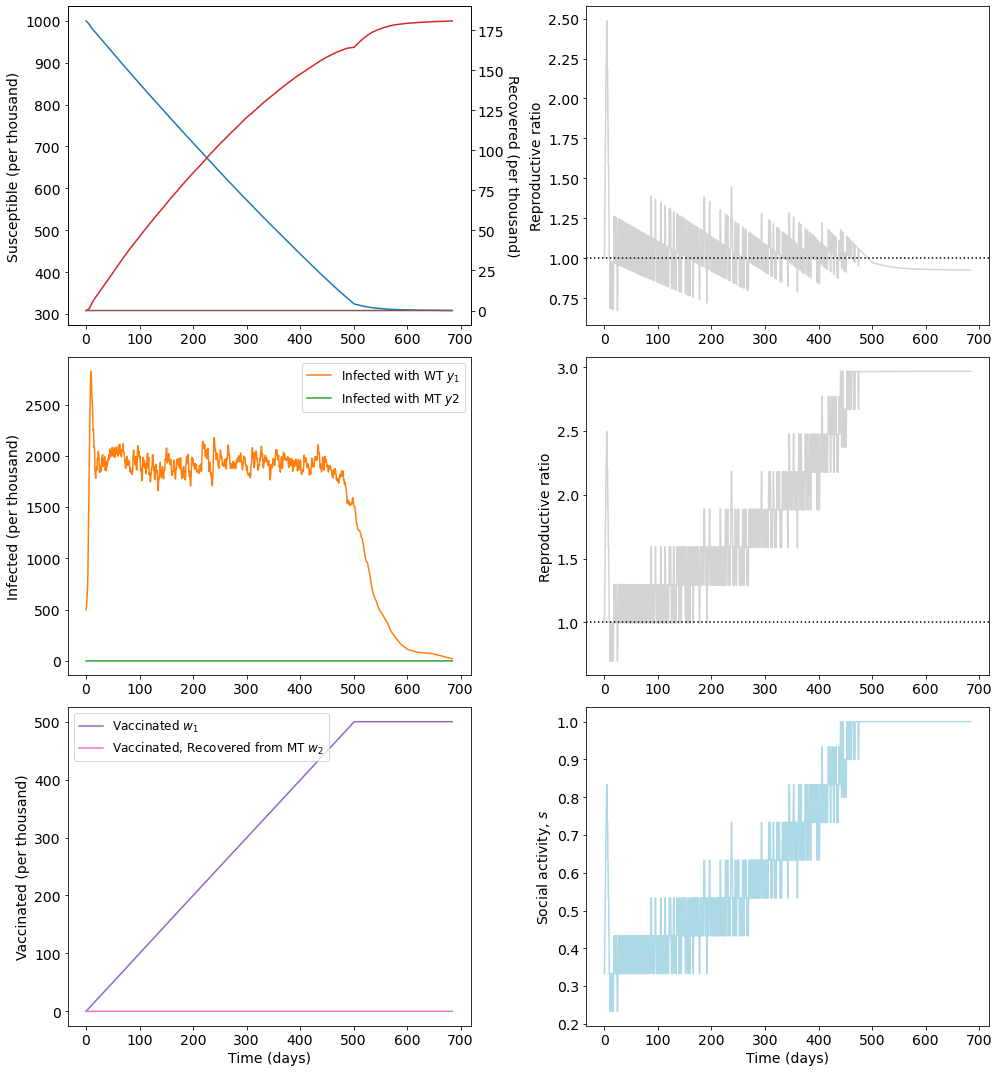

In [38]:
fig, ax = plt.subplots(3,2,figsize=(14,15))

ax[0,0].plot(times, pop_evol[:,0]/1e3, c = 'C0')
ax[0,0].set_ylabel('Susceptible (per thousand)', fontsize = 14)
#ax[0,0].legend(['Susceptible $x$'], fontsize = 13, loc = 'upper center')
ax_z = ax[0,0].twinx()
ax_z.plot(times, pop_evol[:,4]/1e3, c = 'C3')
ax_z.plot(times, pop_evol[:,5]/1e3, c = 'C5')
#ax_z.legend(['Recovered from WT $z_1$', 'Recovered from MT $z_2$'], fontsize = 13, loc = 'bottom right')
ax_z.set_ylabel('Recovered (per thousand)', rotation = 270, labelpad = 15, fontsize = 14)

ax[1,0].plot(times, pop_evol[:,1], c = 'C1')
ax[1,0].plot(times, pop_evol[:,2]+pop_evol[:,3], c = 'C2')
ax[1,0].set_ylabel('Infected (per thousand)', fontsize = 14)
ax[1,0].legend(['Infected with WT $y_1$', 'Infected with MT $y2$'], fontsize = 12)

ax[2,0].plot(times, pop_evol[:,6]/1e3, c = 'C4')
ax[2,0].plot(times, pop_evol[:,7]/1e3, c = 'C6')
ax[2,0].set_ylabel('Vaccinated (per thousand)', fontsize = 14)
ax[2,0].legend(['Vaccinated $w_1$', 'Vaccinated, Recovered from MT $w_2$'], fontsize = 12)


ax[0,1].plot(times, calculate_RWT(pop_evol, beta, a, sevol), c = 'lightgrey')
ax[0,1].axhline(1., linestyle = 'dotted', c = 'k')
ax[0,1].set_ylabel('Reproductive ratio', fontsize = 14)

ax[1,1].plot(times, calculate_RMT(pop_evol, beta, a, sevol), c = 'lightgrey')
ax[1,1].axhline(1., linestyle = 'dotted', c = 'k')
ax[1,1].set_ylabel('Reproductive ratio', fontsize = 14)

ax[2,1].plot(times, sevol,  c='lightblue')
ax[2,1].set_ylabel('Social activity, $s$', fontsize = 14)

ax[2,0].set_xlabel('Time (days)', fontsize = 14)
ax[2,1].set_xlabel('Time (days)', fontsize = 14)

for i in range(3):
    for j in range(2):
        ax[i,j].tick_params(labelsize=14)
        
ax_z.tick_params(labelsize = 14)

plt.tight_layout()
plt.savefig('timeseries_vaxhesitancy_SEPT13.jpg')

### Seasonality

In [28]:
file = 'time_series_seasonality.txt'

with open(file, 'rb') as f:
    result = pickle.load(f)
times, pop_evol, sevol = result['times'], np.array(result['evol']),  np.array(result['sevol'])

In [29]:
seasonality = np.array([1 if (t//180)%2 == 0 else 0.9 for t in times])

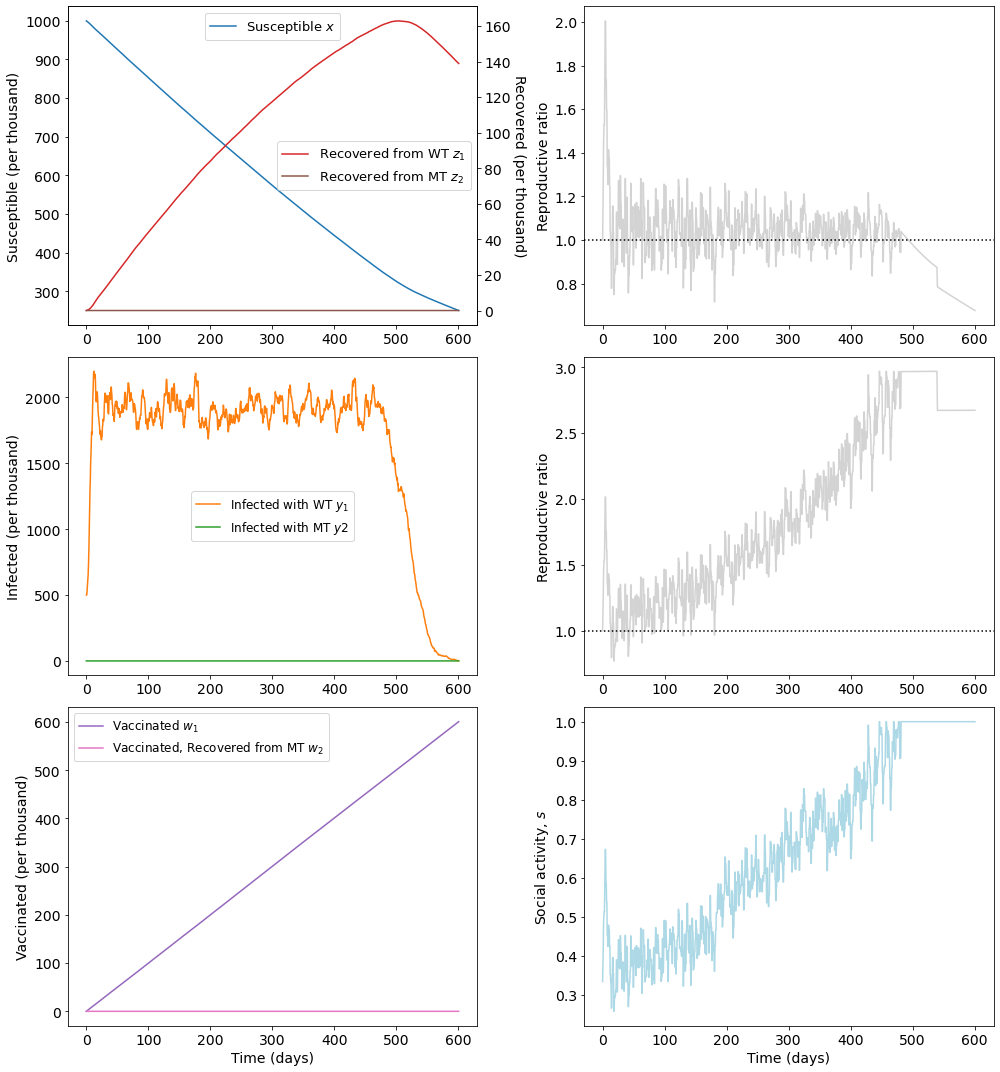

In [32]:
fig, ax = plt.subplots(3,2,figsize=(14,15))

ax[0,0].plot(times, pop_evol[:,0]/1e3, c = 'C0')
ax[0,0].set_ylabel('Susceptible (per thousand)', fontsize = 14)
ax[0,0].legend(['Susceptible $x$'], fontsize = 13, loc = 'upper center')
ax_z = ax[0,0].twinx()
ax_z.plot(times, pop_evol[:,4]/1e3, c = 'C3')
ax_z.plot(times, pop_evol[:,5]/1e3, c = 'C5')
ax_z.legend(['Recovered from WT $z_1$', 'Recovered from MT $z_2$'], fontsize = 13, loc = 'center right')
ax_z.set_ylabel('Recovered (per thousand)', rotation = 270, labelpad = 15, fontsize = 14)

ax[1,0].plot(times, pop_evol[:,1], c = 'C1')
ax[1,0].plot(times, pop_evol[:,2]+pop_evol[:,3], c = 'C2')
ax[1,0].set_ylabel('Infected (per thousand)', fontsize = 14)
ax[1,0].legend(['Infected with WT $y_1$', 'Infected with MT $y2$'], fontsize = 12)

ax[2,0].plot(times, pop_evol[:,6]/1e3, c = 'C4')
ax[2,0].plot(times, pop_evol[:,7]/1e3, c = 'C6')
ax[2,0].set_ylabel('Vaccinated (per thousand)', fontsize = 14)
ax[2,0].legend(['Vaccinated $w_1$', 'Vaccinated, Recovered from MT $w_2$'], fontsize = 12)


ax[0,1].plot(times, seasonality*calculate_RWT(pop_evol, beta, a, sevol), c = 'lightgrey')
ax[0,1].set_ylabel('Reproductive ratio', fontsize = 14)
ax[0,1].axhline(1., linestyle = 'dotted', c = 'k')


ax[1,1].plot(times, seasonality*calculate_RMT(pop_evol, beta, a, sevol), c = 'lightgrey')
ax[1,1].set_ylabel('Reproductive ratio', fontsize = 14)
ax[1,1].axhline(1., linestyle = 'dotted', c = 'k')


ax[2,1].plot(times, sevol,  c='lightblue')
ax[2,1].set_ylabel('Social activity, $s$', fontsize = 14)

ax[2,0].set_xlabel('Time (days)', fontsize = 14)
ax[2,1].set_xlabel('Time (days)', fontsize = 14)

for i in range(3):
    for j in range(2):
        ax[i,j].tick_params(labelsize=14)
        
ax_z.tick_params(labelsize = 14)

plt.tight_layout()
plt.savefig('seasonality_timeseries_SEPT13.jpg', dpi = 400)

### Two Gene Vaccine

In [105]:
file = 'time_series_twogenevaccine.txt'

with open(file, 'rb') as f:
    result = pickle.load(f)
times, pop_evol, sevol = result['times'], np.array(result['evol']),  np.array(result['sevol'])

In [106]:
# 0:x; 1:y1; 2:y2; 3:y3x; 4:y3w; 5:z1; 6:z2; 7:z3; 8:w1; 9:w2;

In [107]:
len(pop_evol[:,0])

2633

In [108]:
len(sevol)

2633

In [112]:
def calculate_RMT_twogene(pop, beta, a, sevol):
    x = pop[:,0]+pop[:,5]+pop[:,6]+pop[:,8]
    #sevol = calculate_s(pop,beta,a)
    return(sevol*beta*x/a)

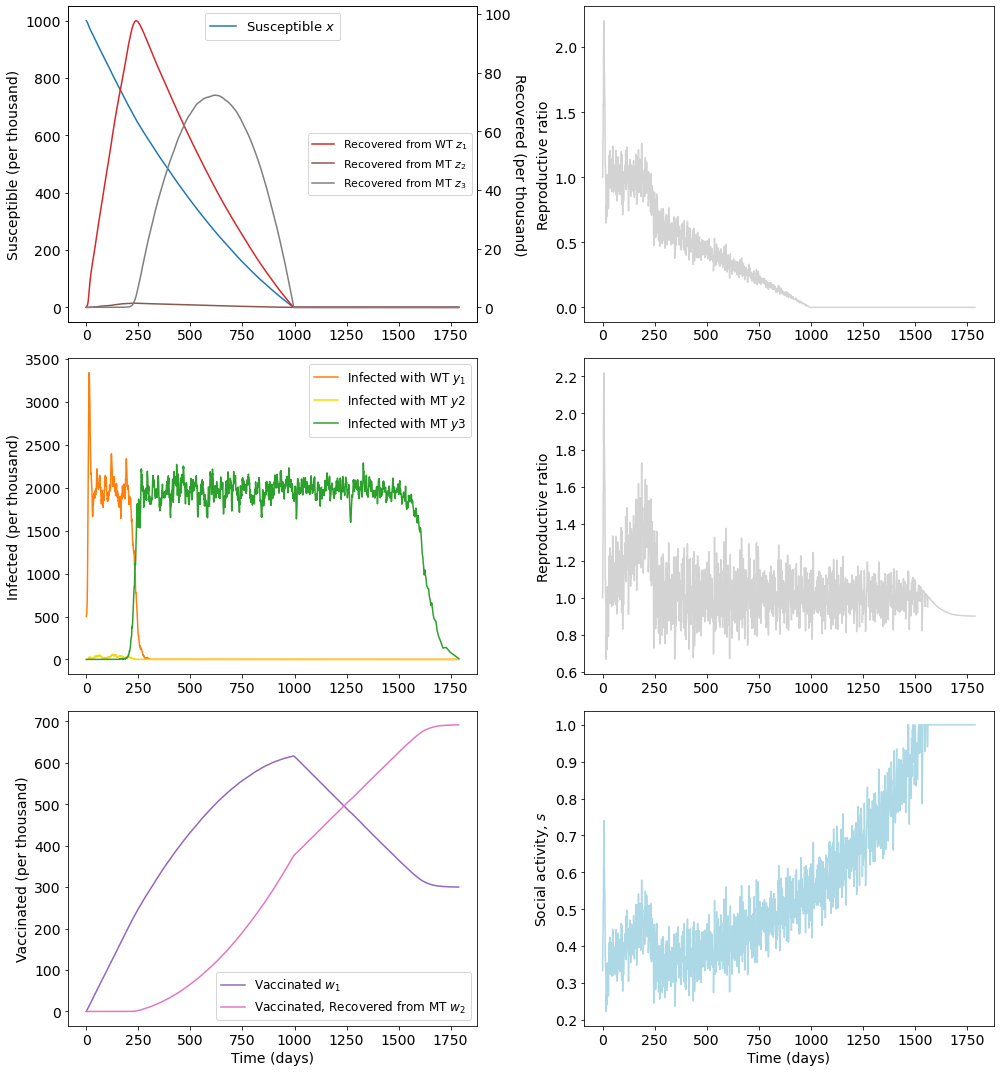

In [116]:
fig, ax = plt.subplots(3,2,figsize=(14,15))

ax[0,0].plot(times, pop_evol[:,0]/1e3, c = 'C0')
ax[0,0].set_ylabel('Susceptible (per thousand)', fontsize = 14)
ax[0,0].legend(['Susceptible $x$'], fontsize = 13, loc = 'upper center')
ax_z = ax[0,0].twinx()
ax_z.plot(times, pop_evol[:,5]/1e3, c = 'C3')
ax_z.plot(times, pop_evol[:,6]/1e3, c = 'C5')
ax_z.plot(times, pop_evol[:,7]/1e3, c = 'C7')
ax_z.legend(['Recovered from WT $z_1$', 'Recovered from MT $z_2$', 'Recovered from MT $z_3$'], fontsize = 11, loc = 'center right')
ax_z.set_ylabel('Recovered (per thousand)', rotation = 270, labelpad = 15, fontsize = 14)

ax[1,0].plot(times, pop_evol[:,1], c = 'C1')
ax[1,0].plot(times, pop_evol[:,2], c = 'gold')
ax[1,0].plot(times, pop_evol[:,4]+pop_evol[:,3], c = 'C2')
ax[1,0].set_ylabel('Infected (per thousand)', fontsize = 14)
ax[1,0].legend(['Infected with WT $y_1$', 'Infected with MT $y2$', 'Infected with MT $y3$'], fontsize = 12)

ax[2,0].plot(times, pop_evol[:,8]/1e3, c = 'C4')
ax[2,0].plot(times, pop_evol[:,9]/1e3, c = 'C6')
ax[2,0].set_ylabel('Vaccinated (per thousand)', fontsize = 14)
ax[2,0].legend(['Vaccinated $w_1$', 'Vaccinated, Recovered from MT $w_2$'], fontsize = 12)


ax[0,1].plot(times, calculate_RWT(pop_evol, beta, a, sevol), c = 'lightgrey')
ax[0,1].set_ylabel('Reproductive ratio', fontsize = 14)

ax[1,1].plot(times, calculate_RMT_twogene(pop_evol, beta, a, sevol), c = 'lightgrey')
ax[1,1].set_ylabel('Reproductive ratio', fontsize = 14)

ax[2,1].plot(times, sevol,  c='lightblue')
ax[2,1].set_ylabel('Social activity, $s$', fontsize = 14)

ax[2,0].set_xlabel('Time (days)', fontsize = 14)
ax[2,1].set_xlabel('Time (days)', fontsize = 14)

for i in range(3):
    for j in range(2):
        ax[i,j].tick_params(labelsize=14)
        
ax_z.tick_params(labelsize = 14)


plt.tight_layout()
plt.savefig('two_genes_timeseries.jpg',dpi = 400)

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'immunitywaning_booster_timeseries.jpg',
 'immunitywaning_nobooster_timeseries.jpg',
 'Plotting Clean.ipynb',
 'Plotting.ipynb',
 'realvax_timeseries.jpg',
 'seasonality_timeseries.jpg',
 'socialdistancing_timeseries.jpg',
 'time_series_immunitywaning_booster.txt',
 'time_series_immunitywaning_nobooster.txt',
 'time_series_realdatavax.txt',
 'time_series_seasonality.txt',
 'time_series_socialdistancing.txt',
 'time_series_vaxhesitancy.txt',
 'vaxhesitancy_timeseries.jpg']